In [ ]:
# Import các thư viện cần thiết

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [ ]:
#Đọc dữ liệu từ file .csv
df = pd.read_csv('/content/Dataset.csv')
df

In [ ]:


#Đọc và lưu 2 thuộc tính 'Pot' và 'Break' vào x1, x2
x1 = df['Pot']
x2 = df['Break']
x1=np.array(x1)
x2=np.array(x2)
X=[]
for i in range(len(x1)):
  point=([[i],x2[i]])
  X.append(point)

# Lưu lại thành mảng các data point
X = np.array([x1,x2]).T



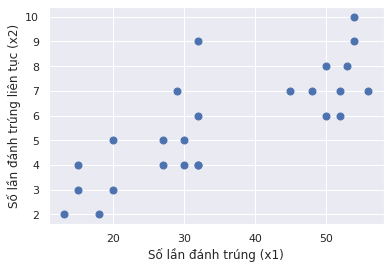

In [ ]:
# Vẽ các data point 
plt.xlabel('Số lần đánh trúng (x1)')
plt.ylabel('Số lần đánh trúng liên tục (x2)')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=7)
plt.plot()
plt.show()

Thử quan sát bằng mắt, ta có thể phân dữ liệu thành 3 cụm, liệu rằng máy có thể phân đúng như ta mong muốn.

# Ta sẽ xây dựng K-means trên Numpy

In [ ]:
# Hàm random n_cluster (số cụm K mong muốn)
def kmeans_init_centers(X, n_cluster):

  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [ ]:
# Hàm dự đoán data point sẽ thuộc cluster nào
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

In [ ]:
# Hàm update lại centers sau khi đã phân cụm
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers


In [ ]:
# Hàm khảo sát k-means đã hội tụ chưa. Tức là center update vẫn bằng center trước
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))


In [ ]:
# Hàm biểu diễn từng bước học của K-means
# Dễ hiểu hơn vì mình viết hàm vẽ ra quá trình làm việc của k-means đó!
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  #Tạo list màu (ở đây mình tạo 3 màu) vì K=3 !! Có thể tạo nhiều hơn nhé
  plt_colors = ['b', 'g', 'r']
  for i in range(n_cluster):
    data = X[labels == i]
    # Biểu diễn ra, mình dùng hình ngôi sao để biểu diễn center, dùng hình tròn để biểu diễn datapoint. Cùng cụm sẽ cùng màu
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + 'o', markersize = 5, label = 'cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i] + '*', markersize = 15, label = 'center_' + str(i))
  #plt.legend()
  plt.show()


In [ ]:
# Hàm xây dựng thuật toán K-means
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Phân nhãn cho dữ liệu lần  ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center lần ' + str(times + 1))
    times += 1 # Biến times của mình để xem việc update center xảy ra mấy lần
  return (centers, labels, times)

[[15  4]
 [13  2]
 [15  3]]


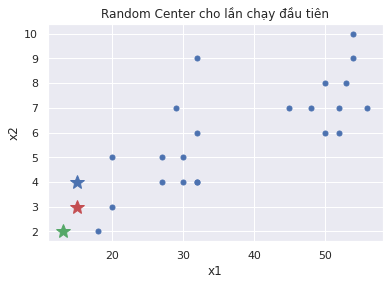

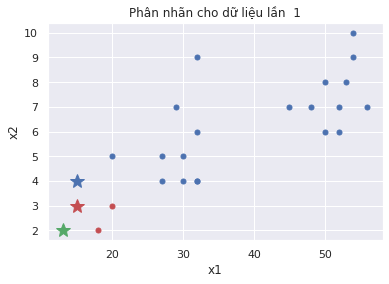

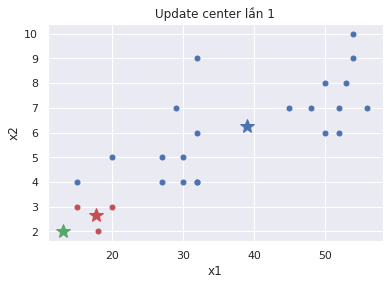

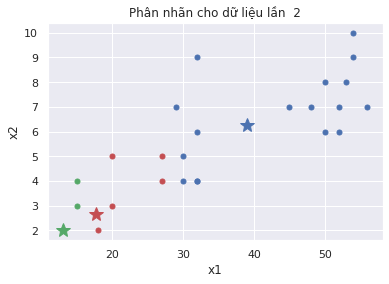

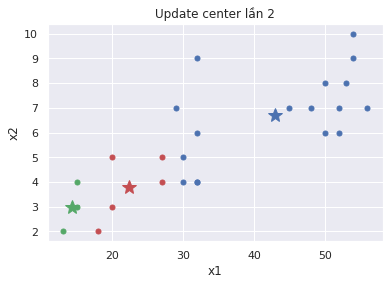

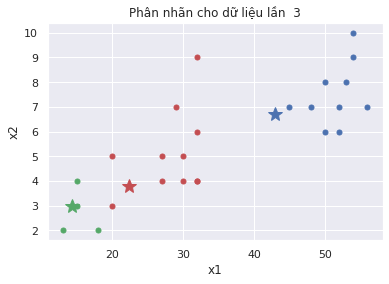

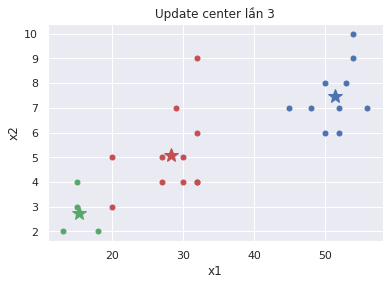

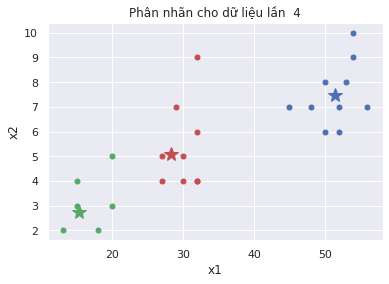

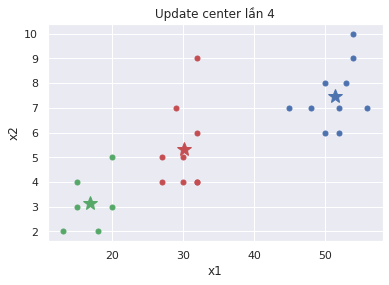

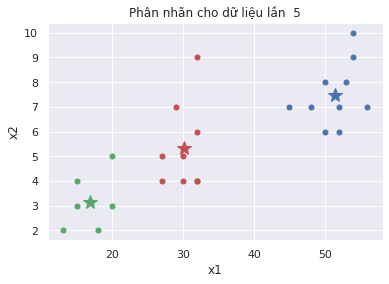

Done! Kmeans đã phân cụm hoàn tất sau 5 bước nhảy.


In [ ]:
# Biểu diễn kết quả:
# Output cuối cùng phụ thuộc vào random center ban đầu , nên tại đây bạn Run nhiều lần sẽ cho ra nhiều kết quả khác nhau nhé

n_cluster =3 # Như mong muốn thì mình sẽ cần n_cluster = 3 tức K=3
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers)

init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Random Center cho lần chạy đầu tiên')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

# Print và xem "con máy" mình học tốt không nào
print('Done! Kmeans đã phân cụm hoàn tất sau', times+1, 'bước nhảy.')

# Giờ thử xử dụng thư viện sklearn nhé

In [ ]:
# Tạo ra 3 center tuỳ thích nhé:
# Có thể xử dụng hàm random những thôi tạo tay cho tiện :v
center_x = [15,30, 45]
center_y = [5 ,6, 7]

In [ ]:
# Train K-means với dữ liệu đã có
kmeans = KMeans(n_clusters = 3,
                n_jobs = -1,
                random_state = 123).fit(X)


In [ ]:
# Dùng kmeabs.labels_ để gán label cho từng data point 
# Mình tạo DataFrame và show ra xem thử nè
df = pd.DataFrame(X, columns = ["x", "y"])
df["label"] = kmeans.labels_

print(df)

     x   y  label
0   50   8      1
1   48   7      1
2   13   2      0
3   32   9      2
4   20   5      0
5   29   7      2
6   15   4      0
7   56   7      1
8   54   9      1
9   32   6      2
10  32   4      2
11  27   4      2
12  45   7      1
13  54  10      1
14  27   5      2
15  18   2      0
16  32   4      2
17  52   7      1
18  50   6      1
19  53   8      1
20  15   3      0
21  30   5      2
22  30   4      2
23  52   6      1
24  20   3      0


Xong rồi đấy: chỉ với 2 dòng code thì sklearn đã cho kết quả. Giờ thì show nó ra thử xem sao thôi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


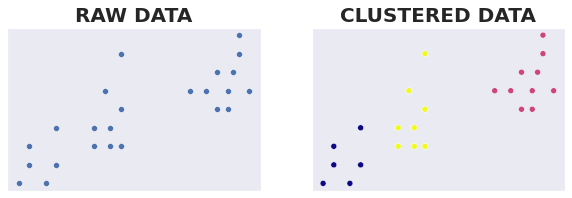

In [ ]:
#Bước này thì vẽ ra xem kết quả thôi
fig, axes = plt.subplots(1, 2, figsize=(10,3))
title = ["Raw Data", "Clustered Data"]
#Vẽ ra dữ liệu ban đầu
idx, ax = 0, axes[0]
sns.scatterplot(x1, x2, ax = ax)
ax.set_title(title[idx].upper(), fontsize = 20, fontweight = "bold")
ax.set_xticks([])
ax.set_yticks([])
#Dữ liệu sau khi phân cụm
idx, ax = 1, axes[1]
sns.scatterplot(data = df, x = "x", y = "y", hue = "label", ax = ax, palette="plasma")
ax.set_title(title[idx].upper(), fontsize = 20, fontweight = "bold")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.get_legend().remove()

Tuyệt vời!!
- Phân cụm bằng thư viện cho chính xác tối ưu thuật toán K-means
- Xây dựng trên Numpy thì phụ thuộc vào random ban đầu, nếu random center tốt thì vẫn cho kết quả khớp với thư viện sklearn
- Giờ thì xem xem nó có phù hợp với việc bạn phân cụm bằng mắt ở đồ thị data ban đầu kh nhé!